In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# world height, world width
WORLD_HEIGHT = 7
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

In [3]:
START = [3, 0]
GOAL = [3, 7]

In [4]:
def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

In [5]:
# play for an episode
def episode(q_value):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
    
    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
        
        # Sarsa update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + ALPHA * (REWARD + q_value[next_state[0], next_state[1], action] - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    
    return time

In [6]:
def figure_6_3():
    np.random.set_state(random_state)

    q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))
    episode_limit = 500

    steps = []
    ep = 0
    while ep < episode_limit:
        steps.append(episode(q_value))
        ep += 1
    steps = np.add.accumulate(steps)

    plt.plot(steps, np.arange(1, len(steps) + 1))
    plt.xlabel("Time steps")
    plt.ylabel("Episodes")
    plt.show()

    # display the optimal policy
    optimal_policy = []
    for i in range(WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue

            best_action = np.argmax(q_value[i, j, :])
            if best_action == ACTION_UP:
                optimal_policy[-1].append("U")
            elif best_action == ACTION_DOWN:
                optimal_policy[-1].append("D")
            elif best_action == ACTION_LEFT:
                optimal_policy[-1].append("L")
            elif best_action == ACTION_RIGHT:
                optimal_policy[-1].append("R")
    print("Optimal policy is:")
    for row in optimal_policy:
        print(row)
    print("Wind strength for each column:")
    print([str(w) for w in WIND])

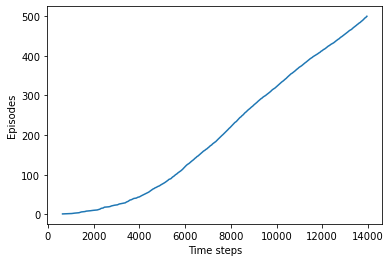

Optimal policy is:
['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'L', 'D']
['U', 'D', 'D', 'R', 'D', 'R', 'U', 'D', 'L', 'L']
['L', 'U', 'D', 'R', 'R', 'U', 'U', 'U', 'D', 'L']
['R', 'R', 'L', 'R', 'U', 'U', 'U', 'U', 'L', 'U']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [7]:
figure_6_3()